# Tema 3: Deutsch-Jozsa

En este notebook vamos a implementar el algoritmo de Deutsch-Jozsa para diferentes tipos de oráculos.

El algoritmo de Deutsch-Jozsa es uno de los primeros algoritmos cuánticos que demostró una ventaja exponencial sobre los algoritmos clásicos. Este algoritmo resuelve el siguiente problema: dada una función booleana f que mapea n bits a 1 bit, determinar si la función es constante (devuelve siempre 0 o siempre 1) o balanceada (devuelve 0 para exactamente la mitad de las entradas y 1 para la otra mitad).

Mientras que un algoritmo clásico necesitaría evaluar la función 2^(n-1) + 1 veces en el peor caso para estar seguro de la respuesta, el algoritmo de Deutsch-Jozsa puede resolver este problema con una única evaluación cuántica del oráculo.

A lo largo de este notebook exploraremos:
- La construcción del circuito cuántico general
- La implementación de diferentes tipos de oráculos (constantes y balanceados)
- La ejecución y análisis de resultados
- La verificación de la ventaja cuántica sobre el enfoque clásico

## Librerías

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Circuito cuántico

Para implementar el algoritmo de Deutsch-Jozsa necesitamos construir un circuito cuántico con una estructura específica que nos permita determinar si una función es constante o balanceada con una única evaluación.

**Estructura de qubits:**

El circuito requiere n+1 qubits en total:
- Los primeros n qubits (que llamaremos qubits de entrada o qubits x) representan el argumento de la función f(x). Estos qubits se inicializan en el estado |0⟩.
- El último qubit (que llamaremos qubit auxiliar o qubit y) es un qubit especial que se inicializa en el estado |1⟩. Este qubit es fundamental para implementar el oráculo en fase y permitir que la interferencia cuántica revele la naturaleza de la función.

**Diseño modular:**

Vamos a crear una función que construya el circuito de forma abstracta y parametrizada. Esta función recibirá dos argumentos:
1. **n**: El número de bits de entrada de la función f(x) que queremos analizar
2. **oracle**: Una instrucción cuántica (gate) que implementa el oráculo específico de la función f(x)

Esta aproximación modular nos permitirá probar el algoritmo con diferentes oráculos sin tener que reescribir toda la estructura del circuito cada vez. Simplemente crearemos diferentes oráculos y los pasaremos como parámetro a nuestra función.

El circuito seguirá la estructura clásica del algoritmo de Deutsch-Jozsa: preparación inicial con puertas Hadamard, aplicación del oráculo, segunda capa de Hadamard, y finalmente medición de los qubits de entrada.

In [2]:
def Deustch_Circuit(n:int, oracle):
    #Registros
    qr_x = QuantumRegister(n, 'qx')
    qr_y = QuantumRegister(1, 'qy')

    cr_x = ClassicalRegister(n, 'cx')

    #Circuito
    qc = QuantumCircuit(qr_x, qr_y, cr_x, name='Deutsch')

    qc.x(qr_y[0])#Por el 1 inicial
    qc.barrier()
    #Capa de H
    qc.h(range(n+1))
    qc.barrier()

    #Oraculo
    qc.append(oracle, range(n+1))
    qc.barrier()

    #Capa final de H
    qc.h(range(n))
    qc.barrier()

    #Mediciones
    qc.measure(range(n), range(n))

    return qc

Ahora definamos un oráculo para introducir.  Vamos a probar con 3 bits de entrada y que implemente la función

$f(x)=1$ si $x_0=1$, sino $f(x)=0$

Esta es una función balanceada.

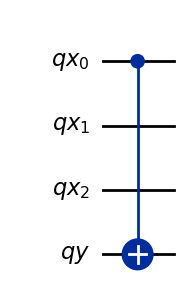

In [3]:
n = 3

#Registros
qr_x = QuantumRegister(n, 'qx')
qr_y = QuantumRegister(1, 'qy')

oracle = QuantumCircuit(qr_x, qr_y, name='Oracle')

#Puertas
oracle.cx(qr_x[0],qr_y[0])

oracle.draw('mpl')

Convertimos el oráculo en una gate.

In [4]:
oracle_gate = oracle.to_gate()

Creamos un circuito cuántico de esos n qubits.

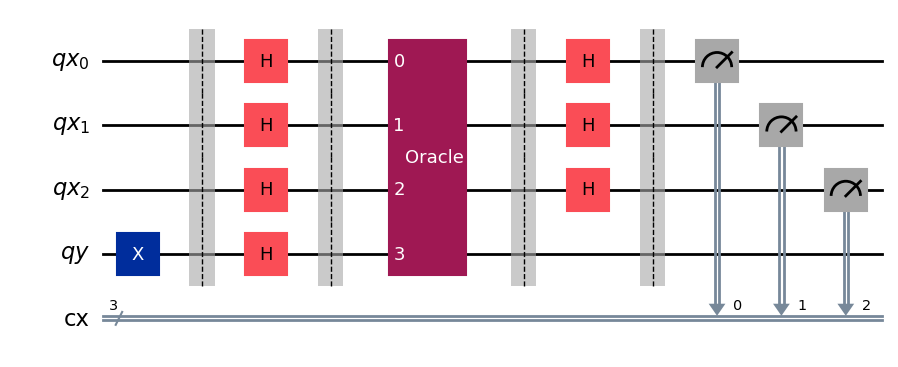

In [5]:
#Introducimos el oráculo y el número de qubits
qc = Deustch_Circuit(n, oracle_gate)

qc.draw('mpl')

# Ejecutando el circuito

Vamos a ejecutar el circuito cuántico en simulador. En principio, deberíamos obtener cualquier estado salvo el 000.

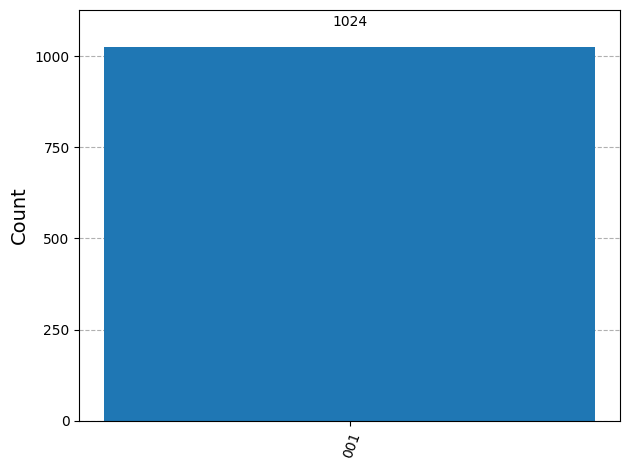

In [6]:
#El backend necesita n+1 qubits
backend = AerSimulator()  # n+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job
job = backend.run(qc_transpiled)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Obtenemos que todas las medidas son para el 001, por lo que es balanceada, como esperábamos.

# Ejercicio con función constante

Ahora crea un oráculo de una función constante, conviértelo en una puerta y crea el circuito para la comprobación.

Luego, transpílalo y ejecútalo en local.

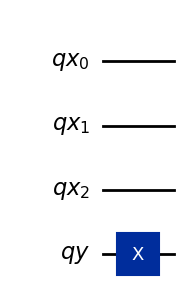

In [7]:
n = 3

#Registros
qr_x = QuantumRegister(n, 'qx')
qr_y = QuantumRegister(1, 'qy')

oracle = QuantumCircuit(qr_x, qr_y, name='Oracle')

#Puertas
#Implemento f(x) = 1
oracle.x(qr_y[0])

oracle_gate = oracle.to_gate()
qc = Deustch_Circuit(n, oracle_gate)

oracle.draw('mpl')

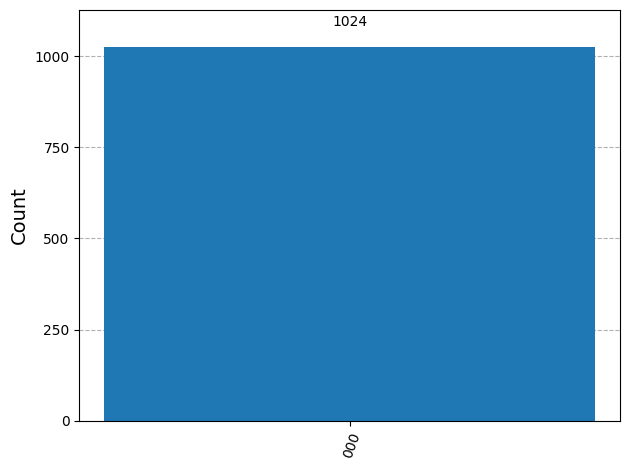

In [8]:
backend = AerSimulator()  # 4)

qc_transpiled = transpile(qc, backend)

#Creamos el job
job = backend.run(qc_transpiled)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)